# maps creation read 4th grade

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mplt
import seaborn as sbn
import plotly.plotly as plty
import plotly.graph_objs as go
import xlrd
import geopandas as gpd
%matplotlib inline

In [2]:
nde_reading4=pd.read_excel('~/Dropbox/pyth/us_ed/NDE/NDECoreExcel_Reading_4.Xls','DataOnly')

In [3]:
nde_reading4.head()

,Year,Jurisdiction,All students,Average scale score
0,2017,Alabama,All students,216.42
1,2017,Alaska,All students,207.038
2,2017,Arizona,All students,215.466
3,2017,Arkansas,All students,216.108
4,2017,California,All students,215.422


In [4]:
nde4=nde_reading4.copy()

### DROP STUDENTS

In [5]:
nde4.drop(['All students'], axis=1, inplace= True)

change average scale score to MN

In [6]:
nde4['MN']=nde4['Average scale score']

In [7]:
nde4.drop(['Average scale score'],axis=1,inplace=True)

In [8]:
nde4.head()

,Year,Jurisdiction,MN
0,2017,Alabama,216.42
1,2017,Alaska,207.038
2,2017,Arizona,215.466
3,2017,Arkansas,216.108
4,2017,California,215.422


In [9]:
nde4.Year.unique()

array([2017, 2015, 2013, 2011, 2009, 2007, 2005, 2003, 2002, '1998¹',
       '1994¹', '1992¹'], dtype=object)

In [10]:
rdyear=[2017, 2015, 2013, 
        2011, 2009, 2007, 2005, 2003, 2002]

In [11]:
rdyear[8]

2002

#### creates dictionary separated into years with a new index for each key

In [12]:
de={}
for x in range(9):
    de['mn_%02d' % rdyear[x]] =(nde4[nde4.Year==rdyear[x]].reset_index())

In [13]:
de

{'mn_2017':     index  Year          Jurisdiction       MN
 0       0  2017               Alabama   216.42
 1       1  2017                Alaska  207.038
 2       2  2017               Arizona  215.466
 3       3  2017              Arkansas  216.108
 4       4  2017            California  215.422
 5       5  2017              Colorado  224.692
 6       6  2017           Connecticut  228.355
 7       7  2017              Delaware  221.482
 8       8  2017  District of Columbia  213.382
 9       9  2017               Florida  228.273
 10     10  2017               Georgia  219.683
 11     11  2017                Hawaii  216.365
 12     12  2017                 Idaho  222.791
 13     13  2017              Illinois  220.366
 14     14  2017               Indiana  226.418
 15     15  2017                  Iowa  221.747
 16     16  2017                Kansas  223.268
 17     17  2017              Kentucky  224.081
 18     18  2017             Louisiana  211.601
 19     19  2017             

In [14]:
yr2017=de['mn_2017'].drop(['Year'],axis=1, inplace=False)

In [15]:
yr2017

,index,Jurisdiction,MN
0,0,Alabama,216.42
1,1,Alaska,207.038
2,2,Arizona,215.466
3,3,Arkansas,216.108
4,4,California,215.422
5,5,Colorado,224.692
6,6,Connecticut,228.355
7,7,Delaware,221.482
8,8,District of Columbia,213.382
9,9,Florida,228.273


###  create new dataframe and combining each new year into a column

In [16]:
combined=pd.DataFrame()

In [17]:
combined['Jurisdiction']=de['mn_2017']['Jurisdiction']

In [18]:
combined['yr2017']=de['mn_2017']['MN']

In [19]:
de['mn_2015']['MN']

0     217.049
1     212.793
2     215.311
3     218.077
4     212.678
5     224.023
6     228.948
7     223.699
8     212.305
9     227.189
10    222.013
11    215.124
12     221.69
13    222.022
14    227.279
15    223.629
16     221.09
17    228.055
18    216.199
19    223.729
20    222.944
21    235.275
22    216.307
23    223.353
24    214.111
25    222.726
26    224.757
27    226.635
28    214.426
29     231.95
30    229.488
31     207.24
32    222.646
33    225.811
34    224.692
35     224.93
36    221.831
37    220.223
38    226.671
39    225.486
40     217.97
41     220.47
42    218.613
43    217.943
44    226.143
45    230.099
46    228.971
47    225.893
48    216.253
49    223.356
50    228.161
Name: MN, dtype: object

In [20]:
rdyear

[2017, 2015, 2013, 2011, 2009, 2007, 2005, 2003, 2002]

In [21]:
combined['yr2015']=de['mn_2015']['MN']
combined['yr2013']=de['mn_2013']['MN']
combined['yr2011']=de['mn_2011']['MN']
combined['yr2009']=de['mn_2009']['MN']
combined['yr2007']=de['mn_2007']['MN']
combined['yr2005']=de['mn_2005']['MN']
combined['yr2003']=de['mn_2003']['MN']
#combined['yr2002']=de['mn_2002']['MN']

In [22]:
combined

,Jurisdiction,yr2017,yr2015,yr2013,yr2011,yr2009,yr2007,yr2005,yr2003
0,Alabama,216.42,217.049,218.576,220.273,216.273,216.389,207.752,207.084
1,Alaska,207.038,212.793,209.347,207.924,211.127,214.477,211.061,211.547
2,Arizona,215.466,215.311,213.134,212.395,209.989,209.521,207.143,208.873
3,Arkansas,216.108,218.077,218.524,216.515,216.152,217.028,217.072,213.615
4,California,215.422,212.678,212.546,211.359,209.762,208.522,206.512,205.632
5,Colorado,224.692,224.023,226.663,223.434,225.697,223.733,223.656,223.661
6,Connecticut,228.355,228.948,229.582,227.427,228.972,227.204,225.753,228.341
7,Delaware,221.482,223.699,225.772,225.131,225.513,225.071,225.838,223.929
8,District of Columbia,213.382,212.305,205.614,200.628,201.985,197.086,190.787,188.374
9,Florida,228.273,227.189,227.463,224.529,225.673,223.535,219.465,218.014


### setting up combined with index Jurisdiction

In [23]:
combined2=combined.set_index(['Jurisdiction'])

In [24]:
combined2.head()

,yr2017,yr2015,yr2013,yr2011,yr2009,yr2007,yr2005,yr2003
Jurisdiction,,,,,,,,
Alabama,216.42,217.049,218.576,220.273,216.273,216.389,207.752,207.084
Alaska,207.038,212.793,209.347,207.924,211.127,214.477,211.061,211.547
Arizona,215.466,215.311,213.134,212.395,209.989,209.521,207.143,208.873
Arkansas,216.108,218.077,218.524,216.515,216.152,217.028,217.072,213.615
California,215.422,212.678,212.546,211.359,209.762,208.522,206.512,205.632


In [25]:
combined2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 8 columns):
yr2017    51 non-null object
yr2015    51 non-null object
yr2013    51 non-null object
yr2011    51 non-null object
yr2009    51 non-null object
yr2007    51 non-null object
yr2005    51 non-null object
yr2003    51 non-null object
dtypes: object(8)
memory usage: 3.6+ KB


In [26]:
combined3=combined2.astype(float)

In [27]:
combined3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 8 columns):
yr2017    51 non-null float64
yr2015    51 non-null float64
yr2013    51 non-null float64
yr2011    51 non-null float64
yr2009    51 non-null float64
yr2007    51 non-null float64
yr2005    51 non-null float64
yr2003    51 non-null float64
dtypes: float64(8)
memory usage: 3.6+ KB


# make maps


## import map shape

In [28]:
import sys
import os

In [52]:
script_dir=os.path.dirname(
    'Macintosh HD/Users//Dropbox/pyth/datasets/geo_data/us_data/tl_2017_us_state.shp')
rel_path='states_basic/states.shp'
abs_file_path=os.path.join(script_dir,rel_path)

In [53]:
fp=abs_file_path
map_fp=gpd.read_file('states.shp')

In [54]:
map_fp.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


In [59]:
map_fp=map_fp.sort_values(by=["STATE_NAME"])

In [60]:
map_fp

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
42,Alabama,43,01,East South Central,AL,POLYGON ((-85.07006727561546 31.98070335724909...
50,Alaska,51,02,Pacific,AK,(POLYGON ((-161.3337853466416 58.7332483821643...
36,Arizona,37,04,Mountain,AZ,POLYGON ((-114.5206273030434 33.02770735822419...
46,Arkansas,47,05,West South Central,AR,POLYGON ((-94.46169128436209 34.19676535931296...
24,California,25,06,Pacific,CA,(POLYGON ((-121.6652203096974 38.1692853630126...
31,Colorado,32,08,Mountain,CO,POLYGON ((-102.0444562914241 37.64147436252109...
18,Connecticut,19,09,New England,CT,"POLYGON ((-73.5303922648683 41.52274536613581,..."
28,Delaware,29,10,South Atlantic,DE,"POLYGON ((-75.70707326689549 38.5575913633743,..."
27,District of Columbia,28,11,South Atlantic,DC,"POLYGON ((-77.007930268107 38.96666736375528, ..."
48,Florida,49,12,South Atlantic,FL,(POLYGON ((-80.7856622716253 28.78519435427305...


In [32]:
map_fp['STATE_NAME']

0                   Hawaii
1               Washington
2                  Montana
3                    Maine
4             North Dakota
5             South Dakota
6                  Wyoming
7                Wisconsin
8                    Idaho
9                  Vermont
10               Minnesota
11                  Oregon
12           New Hampshire
13                    Iowa
14           Massachusetts
15                Nebraska
16                New York
17            Pennsylvania
18             Connecticut
19            Rhode Island
20              New Jersey
21                 Indiana
22                  Nevada
23                    Utah
24              California
25                    Ohio
26                Illinois
27    District of Columbia
28                Delaware
29           West Virginia
30                Maryland
31                Colorado
32                Kentucky
33                  Kansas
34                Virginia
35                Missouri
36                 Arizona
3

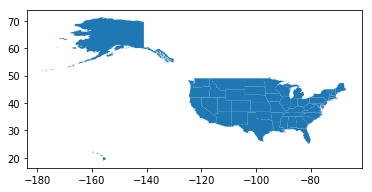

In [61]:
map_fp.plot()

### combined naming variables

In [34]:
combined2.min()

yr2017    207.037630
yr2015    207.240446
yr2013    205.613937
yr2011    200.627988
yr2009    201.984638
yr2007    197.085950
yr2005    190.787356
yr2003    188.374479
dtype: float64

In [47]:
combined2

,yr2017,yr2015,yr2013,yr2011,yr2009,yr2007,yr2005,yr2003
Jurisdiction,,,,,,,,
Alabama,216.42,217.049,218.576,220.273,216.273,216.389,207.752,207.084
Alaska,207.038,212.793,209.347,207.924,211.127,214.477,211.061,211.547
Arizona,215.466,215.311,213.134,212.395,209.989,209.521,207.143,208.873
Arkansas,216.108,218.077,218.524,216.515,216.152,217.028,217.072,213.615
California,215.422,212.678,212.546,211.359,209.762,208.522,206.512,205.632
Colorado,224.692,224.023,226.663,223.434,225.697,223.733,223.656,223.661
Connecticut,228.355,228.948,229.582,227.427,228.972,227.204,225.753,228.341
Delaware,221.482,223.699,225.772,225.131,225.513,225.071,225.838,223.929
District of Columbia,213.382,212.305,205.614,200.628,201.985,197.086,190.787,188.374


In [62]:
combined2.describe()

,yr2017,yr2015,yr2013,yr2011,yr2009,yr2007,yr2005,yr2003
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
unique,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
top,217.316396,217.942913,224.083385,224.062278,217.190628,224.894795,224.577772,222.075166
freq,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
combined3

,yr2017,yr2015,yr2013,yr2011,yr2009,yr2007,yr2005,yr2003
Jurisdiction,,,,,,,,
Alabama,216.419814,217.049090,218.575953,220.273413,216.273356,216.388954,207.752033,207.083848
Alaska,207.037630,212.792600,209.347288,207.923696,211.127368,214.476954,211.061319,211.547154
Arizona,215.465952,215.311336,213.134131,212.395050,209.989270,209.520624,207.142737,208.872801
Arkansas,216.108026,218.077496,218.523885,216.514864,216.151581,217.027818,217.071529,213.615304
California,215.421814,212.677949,212.545968,211.358636,209.762405,208.522186,206.512026,205.632437
Colorado,224.691619,224.023225,226.663220,223.433844,225.696641,223.732653,223.656130,223.660982
Connecticut,228.355312,228.947543,229.581599,227.427304,228.972117,227.203649,225.753020,228.340615
Delaware,221.482217,223.698697,225.771651,225.130511,225.513087,225.070542,225.838459,223.928811
District of Columbia,213.382009,212.305348,205.613937,200.627988,201.984638,197.085950,190.787356,188.374479


In [63]:

years=['yr2017',
 'yr2015',
 'yr2013',
 'yr2011',
 'yr2009',
 'yr2007',
 'yr2005',
 'yr2003']

In [68]:
merged=map_fp.set_index('STATE_NAME').join(combined3)

In [69]:
merged=merged.reindex(merged.index.rename('Jurisdiction'))

In [70]:
merged.max

<bound method DataFrame.max of                       DRAWSEQ STATE_FIPS          SUB_REGION STATE_ABBR  \
Jurisdiction                                                              
Alabama                    43         01  East South Central         AL   
Alaska                     51         02             Pacific         AK   
Arizona                    37         04            Mountain         AZ   
Arkansas                   47         05  West South Central         AR   
California                 25         06             Pacific         CA   
Colorado                   32         08            Mountain         CO   
Connecticut                19         09         New England         CT   
Delaware                   29         10      South Atlantic         DE   
District of Columbia       28         11      South Atlantic         DC   
Florida                    49         12      South Atlantic         FL   
Georgia                    45         13      South Atlantic         

## create a loop to make multiple maps with year annotations

In [71]:
combined3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 8 columns):
yr2017    51 non-null float64
yr2015    51 non-null float64
yr2013    51 non-null float64
yr2011    51 non-null float64
yr2009    51 non-null float64
yr2007    51 non-null float64
yr2005    51 non-null float64
yr2003    51 non-null float64
dtypes: float64(8)
memory usage: 6.1+ KB


In [72]:
years

['yr2017',
 'yr2015',
 'yr2013',
 'yr2011',
 'yr2009',
 'yr2007',
 'yr2005',
 'yr2003']

In [42]:
mplt.Normalize(vmin=vmin, vmax=vmax)

NameError: name 'vmin' is not defined

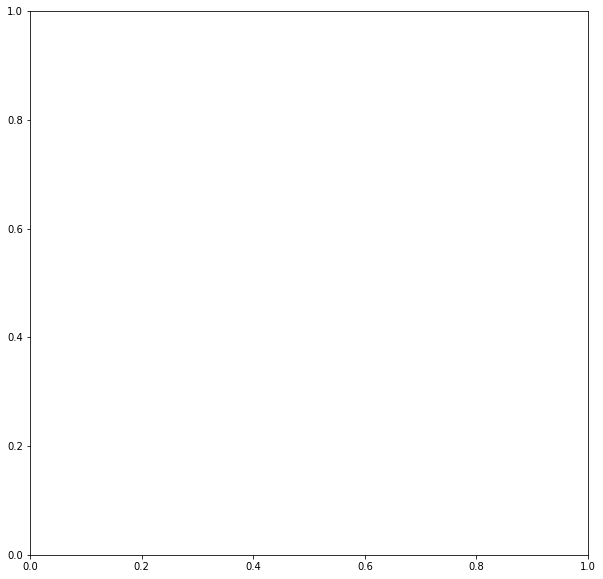

In [73]:
variable='MN'
vmin,max= 180, 240
fig, ax= mplt.subplots(1,figsize=(10,10))

In [74]:
%matplotlib inline

In [ ]:
tmap=merged.plot(column=combined['yr2017'], cmap='Blues', linewidth=0.8, edgecolor='0.8',norm=norm)
tmap
tmap.axis('Off')

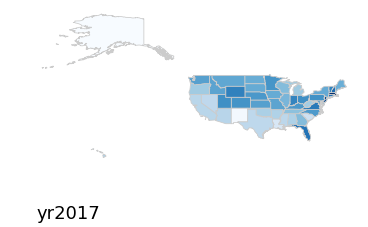

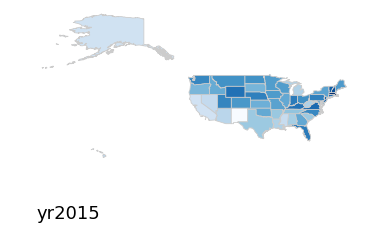

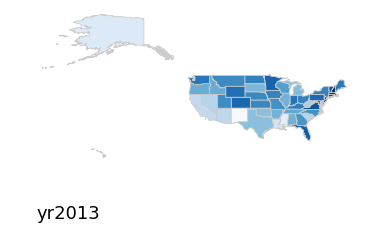

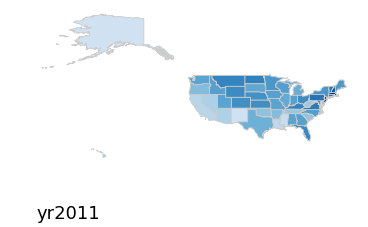

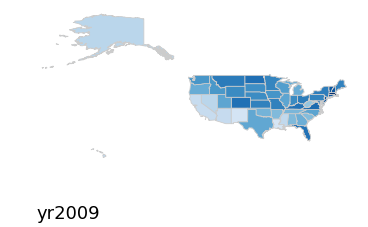

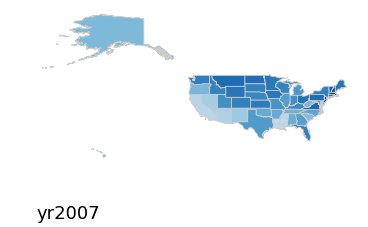

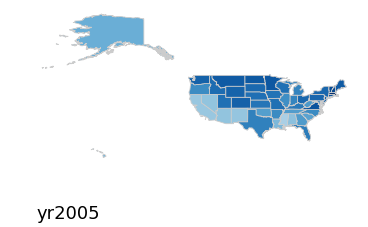

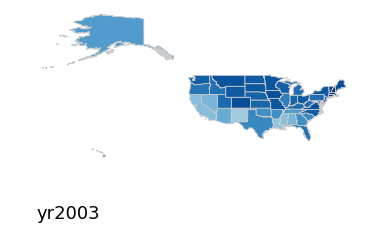

In [75]:
# save all the maps inthe charts folder
output_path='charts/maps'

#counter for the for loops 
i=0
# list of year (which are the column names at the moment)
years= ['yr2017',
 'yr2015',
 'yr2013',
 'yr2011',
 'yr2009',
 'yr2007',
 'yr2005',
 'yr2003',
       'yr2002']
# set the min and max range for the choropleth map
vmin, vmax= 180, 260

#normalize
norm=mplt.Normalize(vmin=vmin, vmax=vmax)
#start the for loop to create one map per year
for x in range(0,8):
    
    #create zmap
    fig=merged.plot(column=combined3[years[x]], cmap='Blues', linewidth=0.8, edgecolor='0.8',norm=norm)
    # add a title
    fig.axis('Off')
    #fig.set_title('Reading Average Score 4th Graders', \
                # fontdict={'fontsize':'24',
                        #  'fontweight':'3'})
    #create annotation for the year
   # only_year=years[x][4:]
    fig.annotate(years[x], xy=(0.1,.1), xycoords='figure fraction',
                horizontalalignment='left',verticalalignment='top',
                fontsize=18)
    filepath=os.path.join(output_path, years[x]+'_reading4.png')
    chart=fig.get_figure()
    chart.savefig(filepath, dpi=400)

In [ ]:
# save all the maps inthe charts folder
output_path='charts/maps'

#counter for the for loops 
i=0
# list of year (which are the column names at the moment)
years= ['yr2017',
 'yr2015',
 'yr2013',
 'yr2011',
 'yr2009',
 'yr2007',
 'yr2005',
 'yr2003']
# set the min and max range for the choropleth map
vmin, vmax= 180, 260

#normalize
norm=mplt.Normalize(vmin=vmin, vmax=vmax)
#start the for loop to create one map per year
for x in range(0,8):
    
    #create zmap
    fig=merged.plot(column=combined3[years[x]], cmap='Blues', linewidth=0.8, edgecolor='0.8',norm=norm)
    # add a title
    fig.axis('Off')
    fig.set_title('Reading Average Score 4th Graders', \
                 fontdict={'fontsize':'24',
                          'fontweight':'3'})
    #create annotation for the year
   # only_year=years[x][4:]
    fig.annotate(years[x], xy=(0.1,.1), xycoords='figure fraction',
                horizontalalignment='left',verticalalignment='top',
                fontsize=18)
    filepath=os.path.join(output_path, years[x]+'_reading4.png')
    chart=fig.get_figure()
    chart.savefig(filepath, dpi=400)